## Linear Regression Evaluation Exercises

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")


# import my functions
import wrangle_no_acquire
import explore_zillow_sfh_2017

In [2]:
# obtaining the data from the created .csv for zillow single-family homes 2017 

zil = pd.read_csv('zillow_single_family_properties_2017.csv')

# obtaining the prepared zillow data

zil = wrangle_no_acquire.prep_zillow(zil)

In [3]:
zil.head()

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [4]:
zil = wrangle_no_acquire.eliminate_outliers(zil)

In [5]:
# splitting the data into train.shape, validate.shape, test.shape

train, validate, test = wrangle_no_acquire.tts_zillow(zil)
train.shape, validate.shape, test.shape

((1189339, 7), (509717, 7), (424765, 7))

### 2. Fit a linear regression model (ordinary least squares) and compute yhat : predictions of ```tax_value``` using only ```area_sqft```. 

In [6]:
# the linear regression model

ols_model = LinearRegression()

# fitting model to train[['area_sqft']], which is the x-value (simple linear regresion), 
# with 'tax_value' as the y-value (target variable)

ols_model.fit(train[['area_sqft']], train[['tax_value']])

LinearRegression()

In [7]:
# rounding and setting target variable name for 'tax_value'

baseline = round(train['tax_value'].mean(), 3)
baseline

438371.596

In [8]:
predictions = train[['area_sqft', 'tax_value']]

In [9]:
# MAKE NEW COLUMN ON DF FOR BASELINE PREDICTIONS

predictions['baseline_predictions'] = baseline

predictions.head()

,area_sqft,tax_value,baseline_predictions
2001253,1421.0,386756.0,438371.596
988305,1159.0,331370.0,438371.596
931832,2960.0,1376200.0,438371.596
1437846,3900.0,1177016.0,438371.596
747796,1396.0,286796.0,438371.596


In [10]:
# create a dataframe of the data (creating a prediction, ie, the yhat)

ols_model.predict(train[['area_sqft']])


# 'area_sqft' = x, 'tax_value' = y

predictions['yhat'] =  ols_model.predict(train[['area_sqft']])
predictions.head()

,area_sqft,tax_value,baseline_predictions,yhat
2001253,1421.0,386756.0,438371.596,3.035185e+05
988305,1159.0,331370.0,438371.596,2.203411e+05
931832,2960.0,1376200.0,438371.596,7.921064e+05
1437846,3900.0,1177016.0,438371.596,1.090529e+06
747796,1396.0,286796.0,438371.596,2.955817e+05


### 3. Plot the residuals for the linear regression model that you made.

In [11]:
# Compute the residuals : Predictions minus the actual.

# the residual column tells how far from the baseline we are from the actual value

predictions['baseline_residual'] = predictions['baseline_predictions'] - predictions['tax_value'] 

predictions.head()

,area_sqft,tax_value,baseline_predictions,yhat,baseline_residual
2001253,1421.0,386756.0,438371.596,3.035185e+05,51615.596
988305,1159.0,331370.0,438371.596,2.203411e+05,107001.596
931832,2960.0,1376200.0,438371.596,7.921064e+05,-937828.404
1437846,3900.0,1177016.0,438371.596,1.090529e+06,-738644.404
747796,1396.0,286796.0,438371.596,2.955817e+05,151575.596


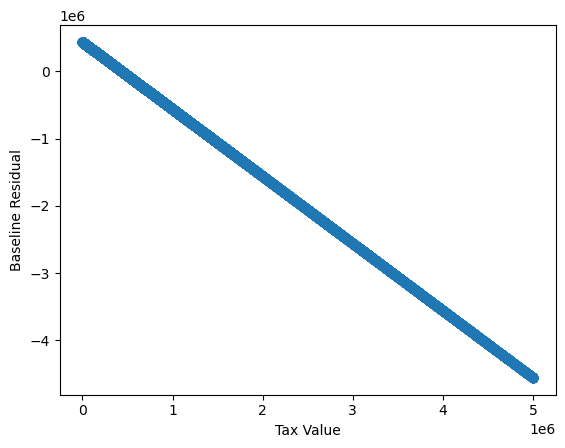

In [12]:
## make a scatter plot

plt.scatter(x = predictions['tax_value'], y = predictions['baseline_residual'])

plt.xlabel('Tax Value')
plt.ylabel('Baseline Residual')
plt.show()

**TAKEAWAYS : This graph shows that the tax value is, in general, less than and negatively correlated to the baseline prediction.**

In [13]:
# creating 'yhat_residual' column and looking at difference between yhat predictions and actual preds['tax_value']

predictions['yhat_residual'] = predictions['yhat'] - predictions['tax_value']
predictions.head()

,area_sqft,tax_value,baseline_predictions,yhat,baseline_residual,yhat_residual
2001253,1421.0,386756.0,438371.596,3.035185e+05,51615.596,-83237.531053
988305,1159.0,331370.0,438371.596,2.203411e+05,107001.596,-111028.949541
931832,2960.0,1376200.0,438371.596,7.921064e+05,-937828.404,-584093.565203
1437846,3900.0,1177016.0,438371.596,1.090529e+06,-738644.404,-86486.766049
747796,1396.0,286796.0,438371.596,2.955817e+05,151575.596,8785.692373


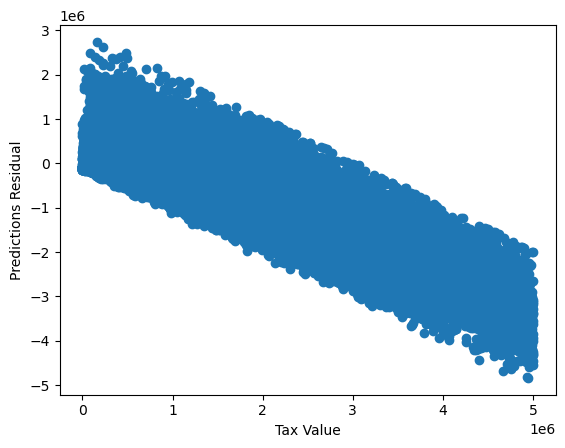

In [14]:
## make a scatter plot of the model's prediction minus the actual preditcion of tax_value

plt.scatter(x = predictions['tax_value'], y = predictions['yhat_residual'])

plt.xlabel('Tax Value')
plt.ylabel('Predictions Residual')
plt.show()

**TAKEAWAYS : This graph shows the tax in relation to the model prediction ; the tax value continues to distance itself from the predicted value as the amount increases.**

### 4. Calculate the sum of squared errors SSE, explained sum of squares ESS, total sum of squares TSS, mean squared error MSE, and root mean squared error RMSE for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [15]:
# calculate SSE
# square the columns of interest to find baseline residuals sqaured and the yhat residuals squared

predictions['baseline_residual_squared'] = predictions['baseline_residual'] ** 2

predictions['yhat_residual_squared'] = predictions['yhat_residual'] ** 2

# shows errors between predictions and actual 
predictions.head()

,area_sqft,tax_value,baseline_predictions,yhat,baseline_residual,yhat_residual,baseline_residual_squared,yhat_residual_squared
2001253,1421.0,386756.0,438371.596,3.035185e+05,51615.596,-83237.531053,2.664170e+09,6.928487e+09
988305,1159.0,331370.0,438371.596,2.203411e+05,107001.596,-111028.949541,1.144934e+10,1.232743e+10
931832,2960.0,1376200.0,438371.596,7.921064e+05,-937828.404,-584093.565203,8.795221e+11,3.411653e+11
1437846,3900.0,1177016.0,438371.596,1.090529e+06,-738644.404,-86486.766049,5.455956e+11,7.479961e+09
747796,1396.0,286796.0,438371.596,2.955817e+05,151575.596,8785.692373,2.297516e+10,7.718839e+07


In [38]:
# find the total amount of error 
# first step in getting to RMSE

total_error = predictions['baseline_residual_squared'].sum()
print(f'The total amount of error is {total_error}.')

The total amount of error is 2.3570308890853197e+17.


In [17]:
# sum of squared error baseline as a variable
sse_baseline = predictions['baseline_residual_squared'].sum()

# sum of squared error yhat
sse_yhat = predictions['yhat_residual_squared'].sum()


In [18]:
# magnitude of error for baseline and for yhat 
print(f'The sum of squared error of the baseline is {sse_baseline}. \nThe sum of squared error of the yhat is {sse_yhat}.')

The sum of squared error of the baseline is 2.3570308890853197e+17. 
The sum of squared error of the yhat is 1.4149384716450658e+17.


In [19]:
# work with new variables that we've saved, not using the df anymore

# find the baseline MSE

mse_baseline = sse_baseline / len(predictions)
print(f'The mean squared error of the baseline is {mse_baseline}.')

# the output number is the mean squared error for the baseline of number of entries in dataframe

The mean squared error of the baseline is 198179904054.7161.


In [20]:
# find the MSE of yhat

mse_yhat = sse_yhat / len(predictions)

print(f'The mse_yhat is {mse_yhat}.')

# undoing the maths that we did to get to sse : this is the average of how much one prediction msises the mark.

The mse_yhat is 118968475064.30595.


In [21]:
# establishing ess baseline as 0.
# calculating the TSS baseline

ess_baseline = 0

tss_baseline = sse_baseline + ess_baseline

print(f'The baseline total sum of squares is {tss_baseline}.')

The baseline total sum of squares is 2.3570308890853197e+17.


In [22]:
# nake new column in preds, for yhat only, because it would not results in a 0

predictions['yhat_mean_residual'] = predictions['yhat'] - predictions['baseline_predictions']


In [23]:
# now we need to square each diffrence
# looking at differenc between predictions and baseline

predictions['yhat_mean_residual_squared'] = predictions['yhat_mean_residual'] ** 2
predictions.head()

,area_sqft,tax_value,baseline_predictions,yhat,baseline_residual,yhat_residual,baseline_residual_squared,yhat_residual_squared,yhat_mean_residual,yhat_mean_residual_squared
2001253,1421.0,386756.0,438371.596,3.035185e+05,51615.596,-83237.531053,2.664170e+09,6.928487e+09,-134853.127053,1.818537e+10
988305,1159.0,331370.0,438371.596,2.203411e+05,107001.596,-111028.949541,1.144934e+10,1.232743e+10,-218030.545541,4.753732e+10
931832,2960.0,1376200.0,438371.596,7.921064e+05,-937828.404,-584093.565203,8.795221e+11,3.411653e+11,353734.838797,1.251283e+11
1437846,3900.0,1177016.0,438371.596,1.090529e+06,-738644.404,-86486.766049,5.455956e+11,7.479961e+09,652157.637951,4.253096e+11
747796,1396.0,286796.0,438371.596,2.955817e+05,151575.596,8785.692373,2.297516e+10,7.718839e+07,-142789.903627,2.038896e+10


In [24]:
# calulating the ess_yhat


ess_yhat = predictions['yhat_mean_residual_squared'].sum()

print(f'The explained sum of squares of the yhat is {ess_yhat}.')

The explained sum of squares of the yhat is 9.420924174395667e+16.


In [25]:
# calculating the TSS yhat

tss_yhat = sse_yhat + ess_yhat

print(f'The tss_yhat is {tss_yhat}.')

The tss_yhat is 2.3570308890846323e+17.


In [26]:
# sqare root of baseline

rmse_baseline = sqrt(mse_baseline)

# sqare root of yvalue

rmse_yhat = sqrt(mse_yhat)


print(f'The root mean squared error of the baseline is {rmse_baseline}. \nThe root mean squared error of the yhat is {rmse_yhat}.')

# shows how many miles on average that the model missed the mark

The root mean squared error of the baseline is 445174.01547565206. 
The root mean squared error of the yhat is 344918.07007506286.


### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average ```tax_value``` amount).


In [27]:
# sum of squared error baseline as a variable
sse_baseline = predictions['baseline_residual_squared'].sum()

# magnitude of error for baseline and for yhat 
print(f'The sum of squared error of the baseline is {sse_baseline}.')

The sum of squared error of the baseline is 2.3570308890853197e+17.


In [28]:
# work with new variables that we've saved, not using the df anymore

# find the baseline MSE

mse_baseline = sse_baseline / len(predictions)
print(f'The mean squared error of the baseline is {mse_baseline}.')

# the output number is the mean squared error for the baseline of number of entries in dataframe

The mean squared error of the baseline is 198179904054.7161.


In [29]:
# establishing ess baseline as 0.
# calculating the TSS baseline

ess_baseline = 0

tss_baseline = sse_baseline + ess_baseline
print(f'The baseline total sum of squares is {tss_baseline}.')

The baseline total sum of squares is 2.3570308890853197e+17.


In [30]:
# finding the RMSE in one step (x = original, y = prediction)
# don't have to import sqrt this way : this shows the average error from the baseline

rmse_baseline = mean_squared_error(predictions['tax_value'], predictions['baseline_predictions'], squared = False)

print(f'The RMSE of the baseline is {rmse_baseline}.')

The RMSE of the baseline is 445174.01547565206.


### 6. Write python code that compares the SSE for your model against the SSE for the baseline model and outputs whether or not your model performs better than the baseline model.

Find the error in the metric that we've made.

Predicted minus actual, then it's squared and summed.

In [31]:
# sum of squared error baseline as a variable
sse_baseline = predictions['baseline_residual_squared'].sum()

# sum of squared error yhat
sse_yhat = predictions['yhat_residual_squared'].sum()



if sse_baseline < sse_yhat:

    print(f'The sum of squared errors of the baseline ({sse_baseline}) is lower than the SSE of the yhat model ({sse_yhat}).'
          ' Therefore, the model performs worse than the baseline. ')

elif sse_baseline > sse_yhat:
    
    print(f'The sum of squared errors of the baseline ({sse_baseline}) is higher than the SSE of the yhat model ({sse_yhat}).'
          ' Therefore, the model performs better than the baseline. ')
    
    
    

The sum of squared errors of the baseline (2.3570308890853197e+17) is higher than the SSE of the yhat model (1.4149384716450658e+17). Therefore, the model performs better than the baseline. 


### 7. What is the amount of variance explained in your model?
The outliers have not yet been removed.



In [35]:
# Find the r-value using sklearn.metrics.explained_variance_score

evs = explained_variance_score(predictions['tax_value'], predictions['yhat'])

print(f'The explained variance (r-value, correlation coefficient) is {round(evs, 5)}.')

The explained variance (r-value, correlation coefficient) is 0.39969.


In [33]:
rvalue = ess_yhat / tss_yhat

print(f'The trend line from the modelling correctly describes the data about {(round(rvalue * 100, 3))} pc of the time.')

The trend line from the modelling correctly describes the data about 39.969 pc of the time.


In [34]:
r2_score(predictions['tax_value'], predictions['yhat'])

0.39969455716630253

### 8. Is your model better than the baseline model?
Yes, by about 40 per cent.


### 9. Create a file named evaluate.py that contains the following functions.

- ```plot_residuals(y, yhat)```: creates a residual plot
- ```regression_errors(y, yhat)```: returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
- ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
- ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false

